In [38]:
import pandas as pd
import numpy as np

In [39]:
data = pd.read_csv("income_evaluation.csv")

In [40]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
df = data.copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [44]:
cols = df.select_dtypes(object).columns
df[cols] = df[cols].apply(lambda x: x.str.strip())
df.columns = df.columns.str.strip()

In [45]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [46]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [51]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler
class DataFrameModifier(BaseEstimator,TransformerMixin):
    def fit(self, df):
        self.df = df
        
    def transform(self):
        columns=['occupation', 'fnlwgt', 'education', 'native-country', 'relationship']
        self.df.drop(columns, axis=1, inplace=True)
result=DataFrameModifier()        

In [52]:
result.fit(df)

In [53]:
result.transform()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [55]:
from sklearn.preprocessing import LabelBinarizer
coder = LabelBinarizer()

In [56]:
df["income"] = coder.fit_transform(df["income"])

In [57]:
X=df.drop("income",axis=1)
Y=df.income
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.23,random_state=42)

In [58]:
numeric_columns=X.select_dtypes(include="number").columns
categorical_columns=X.select_dtypes(include="object").columns

In [59]:
numeric_columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [60]:
categorical_columns

Index(['workclass', 'marital-status', 'race', 'sex'], dtype='object')

In [61]:
import missingno as msno

<AxesSubplot:>

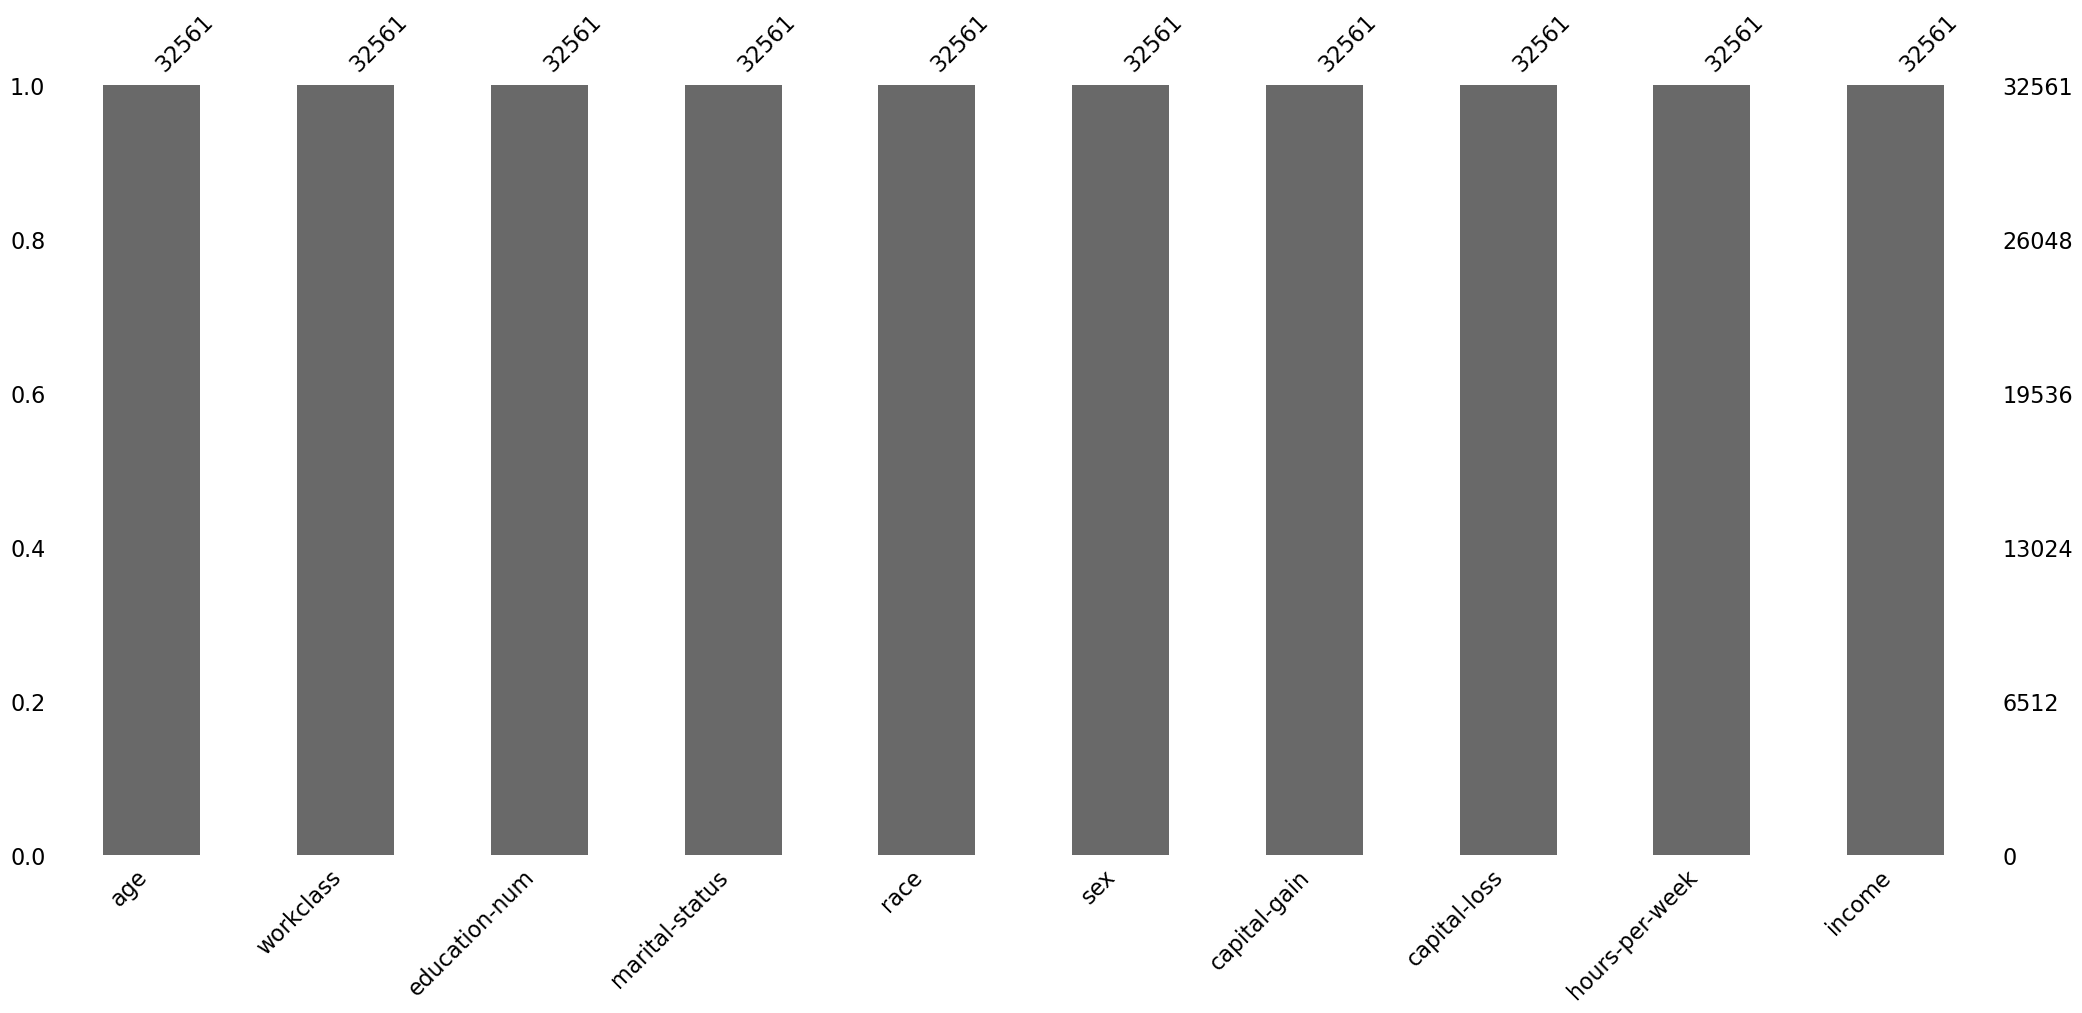

In [62]:
msno.bar(df)

In [63]:
import pipename as pn

In [64]:
import missingno as msno

In [65]:
numerical_Pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [66]:
categorical_Pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_Pipeline, categorical_columns),
        ('numerical', numerical_Pipeline, numeric_columns)
    ])


In [68]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [69]:
pipe.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'marital-status', 'race', 'sex'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))]))])

In [70]:
columns=pn.get_feature_names(preprocessor)
columns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nihad\OneDrive\Masaüstü\bootcamp\pipename.py:34: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['encoder__x0_?',
 'encoder__x0_Federal-gov',
 'encoder__x0_Local-gov',
 'encoder__x0_Never-worked',
 'encoder__x0_Private',
 'encoder__x0_Self-emp-inc',
 'encoder__x0_Self-emp-not-inc',
 'encoder__x0_State-gov',
 'encoder__x0_Without-pay',
 'encoder__x1_Divorced',
 'encoder__x1_Married-AF-spouse',
 'encoder__x1_Married-civ-spouse',
 'encoder__x1_Married-spouse-absent',
 'encoder__x1_Never-married',
 'encoder__x1_Separated',
 'encoder__x1_Widowed',
 'encoder__x2_Amer-Indian-Eskimo',
 'encoder__x2_Asian-Pac-Islander',
 'encoder__x2_Black',
 'encoder__x2_Other',
 'encoder__x2_White',
 'encoder__x3_Female',
 'encoder__x3_Male',
 'numerical__age',
 'numerical__education-num',
 'numerical__capital-gain',
 'numerical__capital-loss',
 'numerical__hours-per-week']

In [71]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [72]:
X_train_final=pd.DataFrame(X_train,columns=columns)
X_test_final=pd.DataFrame(X_test,columns=columns)
X_train_final.head()

,encoder__x0_?,encoder__x0_Federal-gov,encoder__x0_Local-gov,encoder__x0_Never-worked,encoder__x0_Private,encoder__x0_Self-emp-inc,encoder__x0_Self-emp-not-inc,encoder__x0_State-gov,encoder__x0_Without-pay,encoder__x1_Divorced,...,encoder__x2_Black,encoder__x2_Other,encoder__x2_White,encoder__x3_Female,encoder__x3_Male,numerical__age,numerical__education-num,numerical__capital-gain,numerical__capital-loss,numerical__hours-per-week
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-0.044679,0.355423,-0.145812,-0.219248,-0.031522
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.592711,-3.135663,-0.145812,-0.219248,-0.031522
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-0.997070,-1.584069,-0.145812,-0.219248,-0.031522
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.687929,1.519118,-0.145812,-0.219248,0.780696
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-1.216853,-0.420374,-0.145812,-0.219248,-0.031522


In [73]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

Confusion Matrix 
 [[5470  240]
 [ 825  955]]


0.8578104138851802